In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data preprocessing

In [6]:
df.isnull().values.any()

False

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.shape

(10000, 14)

In [9]:
df.select_dtypes('object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [10]:
df.select_dtypes(['int64','int32','float64','float32']).columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [11]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [15]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'],inplace=True)

In [17]:
df.shape

(10000, 11)

In [18]:
df.select_dtypes('object').columns

Index(['Geography', 'Gender'], dtype='object')

In [20]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [21]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [27]:
df = pd.get_dummies(df,drop_first=True,dtype=int)

In [21]:
df = pd.get_dummies(df,drop_first=True,dtype='int64')

In [22]:
df.shape

(10000, 12)

In [29]:
len(df[df['Exited'] == 1])

2037

In [30]:
len(df[df['Exited'] == 0])

7963

<Axes: xlabel='Exited', ylabel='count'>

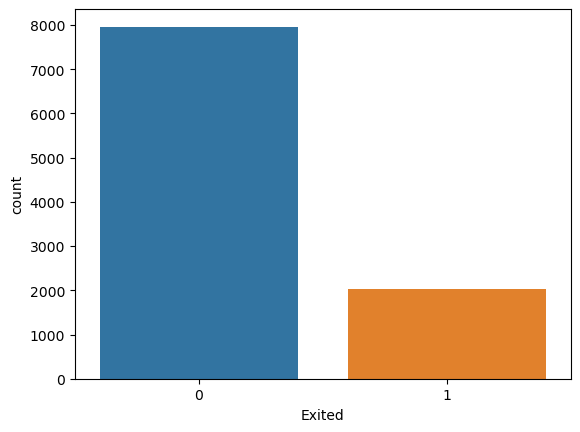

In [31]:
sns.countplot(x=df['Exited'])

In [32]:
df2 = df.drop(columns = 'Exited')

In [33]:
df2.corrwith(df['Exited'])

CreditScore         -0.027094
Age                  0.285323
Tenure              -0.014001
Balance              0.118533
NumOfProducts       -0.047820
HasCrCard           -0.007138
IsActiveMember      -0.156128
EstimatedSalary      0.012097
Geography_Germany    0.173488
Geography_Spain     -0.052667
Gender_Male         -0.106512
dtype: float64

<Axes: title={'center': 'Correlated with Exited'}>

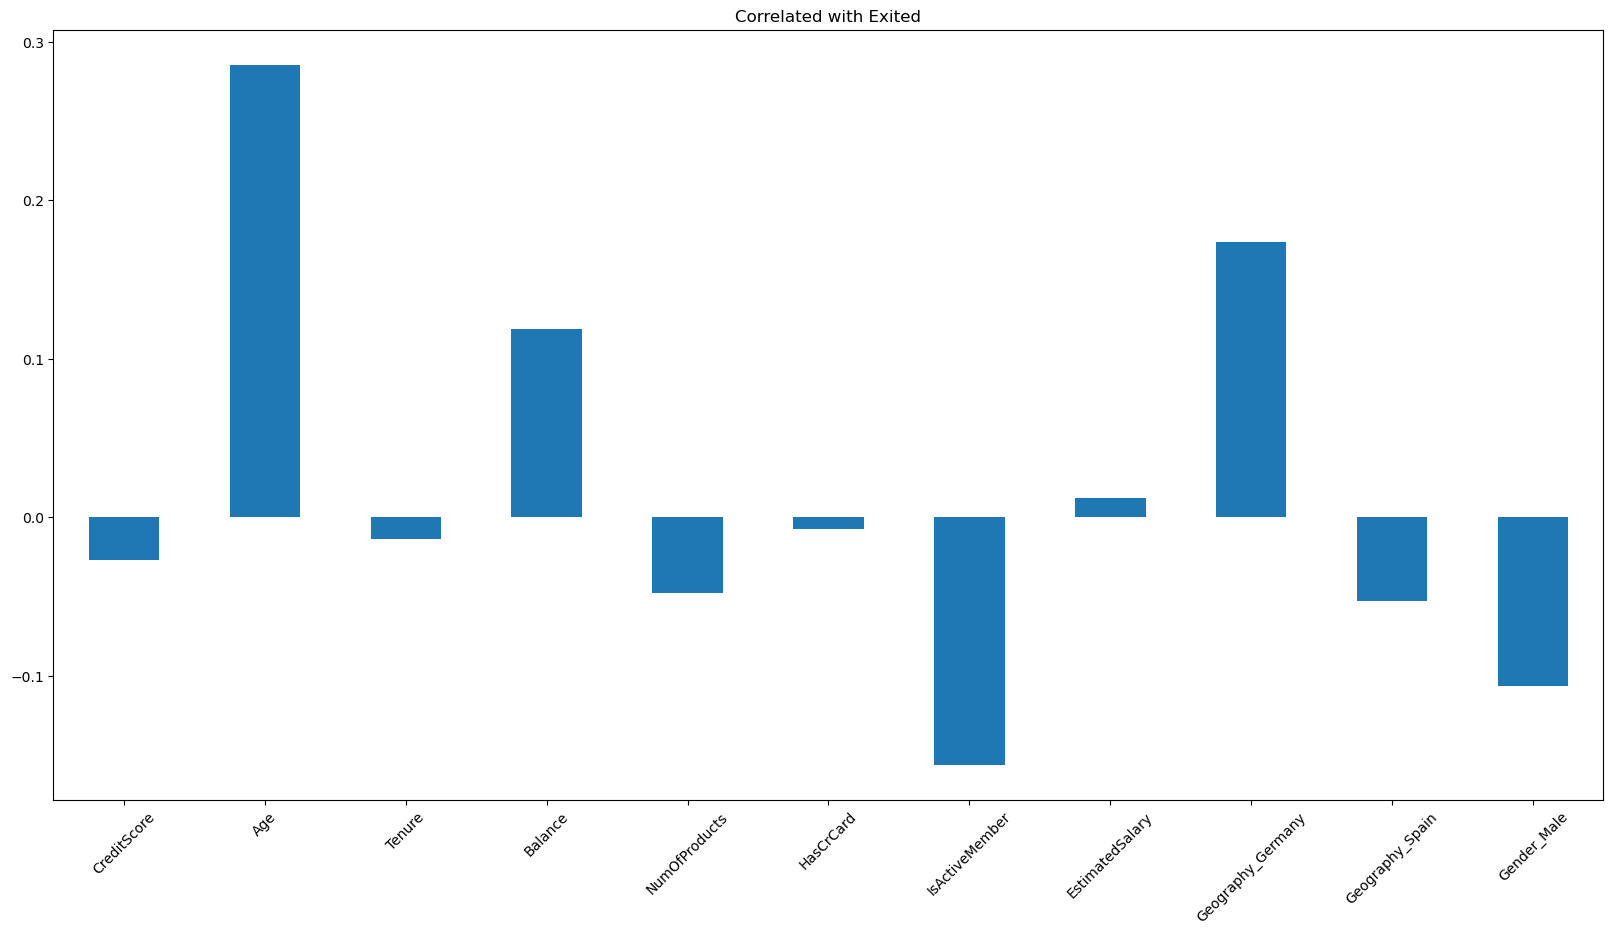

In [34]:
df2.corrwith(df['Exited']).plot.bar(
    figsize=(20,10), title='Correlated with Exited',rot=45
)

In [35]:
corr = df.corr()

In [36]:
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.106512
Geography_Germany,0.005538,0.046897,-0.000567,0.401110,-0.010419,0.010577,-0.020486,0.010297,0.173488,1.000000,-0.332084,-0.024628


<Axes: >

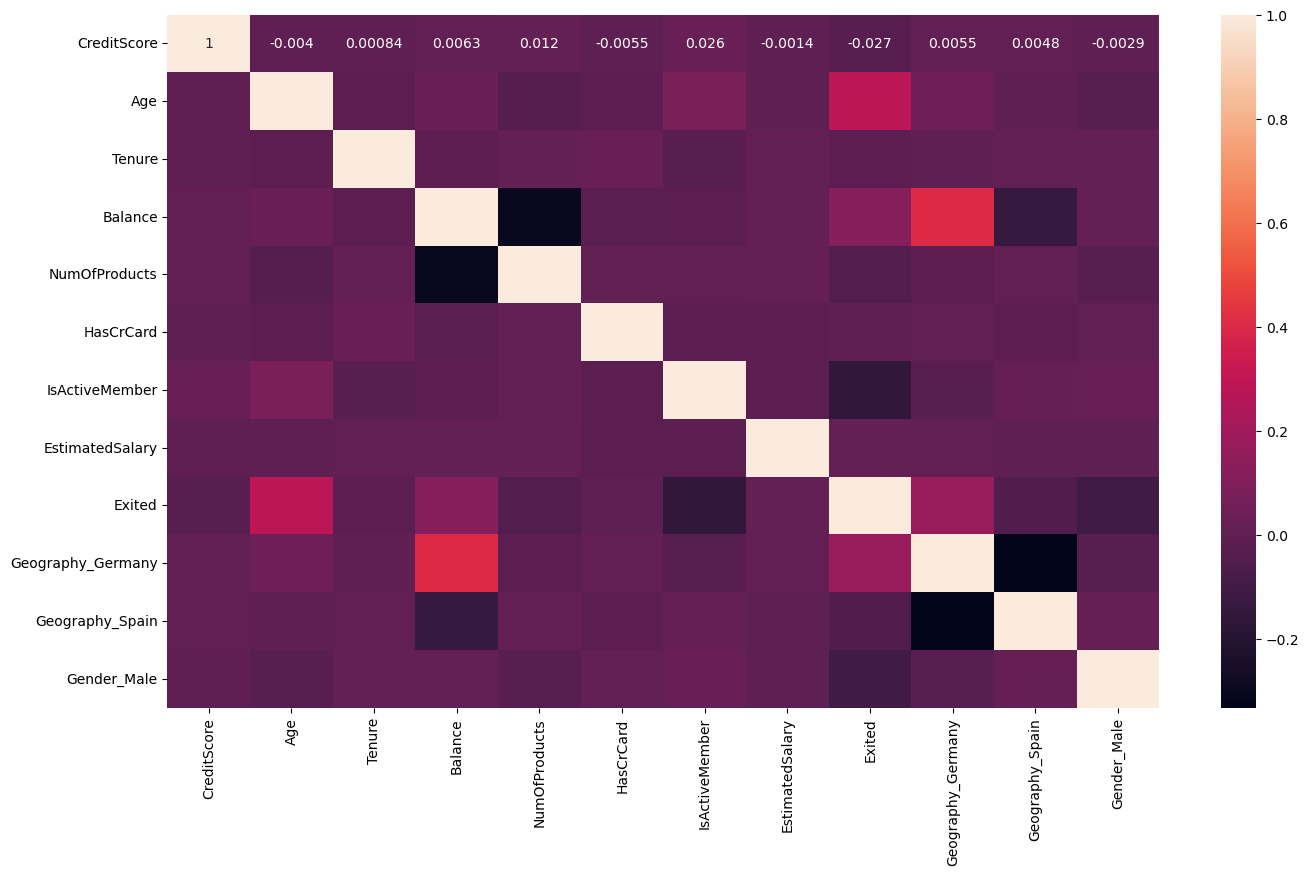

In [42]:
plt.figure(figsize=(16,9))
sns.heatmap(corr,annot=True)

In [43]:
X = df.drop(columns='Exited')
y = df['Exited']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
sc = StandardScaler()

In [47]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
from sklearn.linear_model import LogisticRegression

In [69]:
lr = LogisticRegression()

In [70]:
lr.fit(X_train,y_train)

LogisticRegression()

In [71]:
y_pred = lr.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score , confusion_matrix , f1_score , precision_score , recall_score

In [73]:
acc = accuracy_score(y_test , y_pred)
f1 = f1_score(y_test , y_pred)
prec = precision_score(y_test , y_pred)
rec = recall_score(y_test , y_pred)

In [74]:
results = pd.DataFrame([['Logistic regression',acc,f1,prec,rec]], columns = ['Model', 'Accuracy' , 'F1 score' , 'Precision', 'Recall'])

In [75]:
results

,Model,Accuracy,F1 score,Precision,Recall
0,Logistic regression,0.811,0.336842,0.581818,0.237037


In [76]:
cm = confusion_matrix(y_test , y_pred)
cm

array([[1526,   69],
       [ 309,   96]], dtype=int64)

In [77]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lr , X = X_train, y = y_train,cv=10)

In [78]:
print('Accuracy is :: ' , (accuracies.mean())*100 , '%')
print('Standard deviation is :: ', (accuracies.std())*100 , '%')

Accuracy is ::  80.8375 %
Standard deviation is ::  0.8786530885395 %


In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rf = RandomForestClassifier()

In [81]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [82]:
y_pred = rf.predict(X_test)

In [83]:
acc = accuracy_score(y_test , y_pred)
f1 = f1_score(y_test , y_pred)
prec = precision_score(y_test , y_pred)
rec = recall_score(y_test , y_pred)

In [84]:
results_RF = pd.DataFrame([['Random forest',acc,f1,prec,rec]], columns = ['Model', 'Accuracy' , 'F1 score' , 'Precision', 'Recall'])

In [88]:
results = pd.concat([results,results_RF],ignore_index=True)

In [89]:
results

,Model,Accuracy,F1 score,Precision,Recall
0,Logistic regression,0.8110,0.336842,0.581818,0.237037
1,Random forest,0.8685,0.612666,0.759124,0.513580


In [93]:
!pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 660.6 kB/s eta 0:02:31
   ---------------------------------------- 0.0/99.8 MB 487.6 kB/s eta 0:03:25
   ---------------------------------------- 0.0/99.8 MB 487.6 kB/s eta 0:03:25
   ---------------------------------------- 0.1/99.8 MB 435.7 kB/s eta 0:03:49
   ---------------------------------------- 0.1/99.8 MB 467.6 kB/s eta 0:03:34
   ---------------------------------------- 0.2/99.8 MB 546.6 kB/s eta 0:03:03
   ---------------------------------------- 0.2/99.8 MB 593.2 kB/s eta 0:02:48
   ---------------------------------------- 0.3/99.8 MB 737.3 kB/s eta 0:02:15
   ---------------------------------------- 0.3/99.8 MB 800.8 kB/s eta 0:02:05
   ---------------------------------------- 0.4/99.8 MB 895.2 kB/s eta 0:01:51
   ---------------------------------------- 0.5/99.8 MB 992.2 kB/s eta

In [94]:
from xgboost import XGBClassifier

In [96]:
classifier_xgb = XGBClassifier()
classifier_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [98]:
y_pred = classifier_xgb.predict(X_test)

In [99]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [102]:
results_XGB = pd.DataFrame([['XGBoost', acc, prec, rec, f1]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [103]:
results = pd.concat([results,results_XGB],ignore_index=True)

In [104]:
results

,Model,Accuracy,F1 score,Precision,Recall,F1 Score
0,Logistic regression,0.8110,0.336842,0.581818,0.237037,NaN
1,Random forest,0.8685,0.612666,0.759124,0.513580,NaN
2,XGBoost,0.8525,NaN,0.670807,0.533333,0.594223


In [105]:
from sklearn.model_selection import RandomizedSearchCV

In [106]:
parameters ={
    'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth':[3, 4, 5, 6, 8, 10, 12, 15],
    'min_child_weight':[1, 3, 5, 7],
    'gamma':[0.0, 0.1, 0.2 , 0.3, 0.4],
    'colsample_bytree':[0.3, 0.4, 0.5 , 0.7]
    }

In [107]:
randomized_search = RandomizedSearchCV(estimator = classifier_xgb, param_distributions = parameters,n_iter = 5, scoring='roc_auc', n_jobs = -1, cv = 5, verbose=3)

In [109]:
randomized_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [110]:
randomized_search.best_estimator_


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [111]:
randomized_search.best_params_

{'min_child_weight': 1,
 'max_depth': 4,
 'learning_rate': 0.1,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [112]:
randomized_search.best_score_

0.8634954459530204